# Implement Principal Component Analysis and Face Recognition using PCA

In [1]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


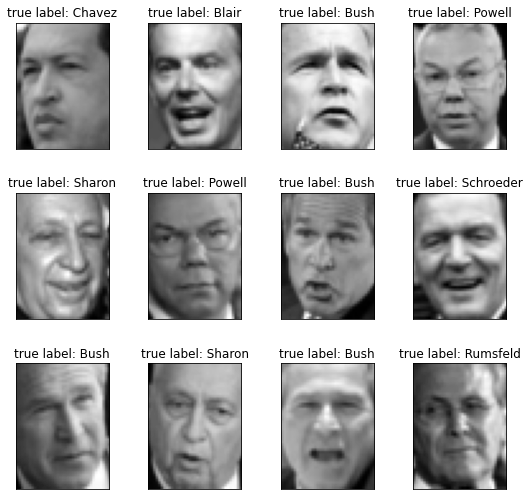

In [4]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label: % s' % (true_name)

true_titles = [true_title(y, target_names, i)
for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(y_train.shape[0], y_test.shape[0]))

size of training Data is  966 and Testing Data is  322


In [10]:
from time import time

n_components = 150
t0 = time()
pca = PCA(n_components = n_components, svd_solver ='randomized', whiten = True).fit(X_train)
print("done in % 0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in % 0.3fs" % (time() - t0))

done in  0.113s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.016s


In [12]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
print("Dimensions of training set = % s and Test Set = % s"%(X_train.shape, X_test.shape))

Sample Data point after applying PCA
 [-2.0756032  -1.0457916   2.1269364   0.03682139 -0.757567   -0.51736623
  0.8555065   1.0519369   0.45773777  0.01347729 -0.03963248  0.6387263
  0.48166943  2.3378541   1.7784541   0.13308632 -2.2713253  -4.4569674
  2.097628   -1.1379254   0.18843494 -0.3349755   1.1254572  -0.32402483
  0.14093065  1.0769353   0.7588309  -0.09976928  3.1199572   0.8837761
 -0.89338034  1.159604    1.4306276   1.6856381   1.3434589  -1.2591333
 -0.6391263  -2.3362787  -0.01371578 -1.4638852  -0.46884668 -1.0547469
 -1.3328594   1.1363696   2.2223487  -1.8015273  -0.30623782 -1.028425
  4.7736416   3.4598582   1.9259627  -1.3512428  -0.25882423  2.0104215
 -1.0565367   0.3608064   1.1711143   0.7575033   0.90065414  0.59932965
 -0.4653361   2.0981355   1.3455778   1.9331867   5.066952   -0.70533204
  0.60640717 -0.89904875 -0.21429199 -2.1076744  -1.6812096  -0.19653304
 -1.7456497  -3.055236    2.0528047   0.39445785  0.12771842  1.2109721
 -0.7921295  -1.389978

In [13]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel ='rbf', class_weight ='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in % 0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in % 0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred, target_names = target_names))
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Fitting the classifier to the training set
done in  17.469s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in  0.062s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.82      0.88      0.85        60
  Donald Rumsfeld       0.85      0.63      0.72        27
    George W Bush       0.85      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.86       322
        macro avg       0.89      0.74      0.80       322
     weighted avg       0.87      0.86      0.85       322

Confusion Matrix is:
[[  7   1   0   5   0   0   0]
 [  1  53   1   5   0   0   0]
 [  1   3  17   6   0   0   0]
 [  0   3   0 143   0   0  

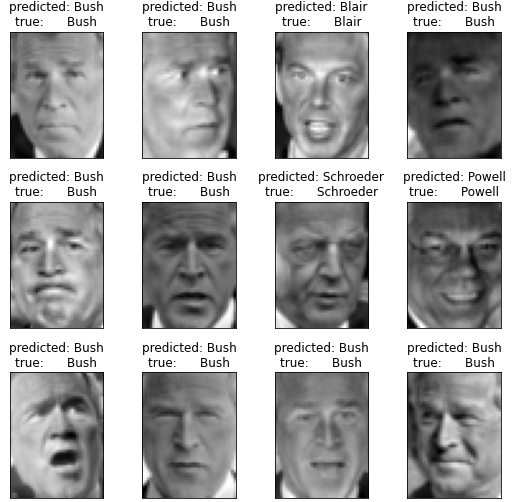